### 1. Import all the required libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re
import time
from pprint import pprint
import pprintpp

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Read the input data

In [97]:
data = pd.read_csv("Cancer_data.csv")
data.head()

,Text,Class
0,abstract background non small cell lung cancer...,1
1,abstract background non small cell lung cancer...,2
2,recent evid demonstr acquir uniparent disomi a...,2
3,oncogen mutat monomer casita b lineag lymphoma...,3
4,oncogen mutat monomer casita b lineag lymphoma...,4


In [98]:
print("The shape of the input text data is : ", data.shape)

The shape of the input text data is :  (500, 2)


### 3. Processing the input text data

#### 3.1 Initializing the Stemmer and Lemmatizer

In [99]:
stop_words = stopwords.words('english')
porter = PorterStemmer()
lemmer = WordNetLemmatizer()

#### 3.2 Creating the Corpus

In [100]:
text = data["Text"]
line = text[0]
print("The line is : \n", line)
print("The type of line is :", type(line))

The line is : 
 abstract background non small cell lung cancer nsclc heterogen group disord number genet proteom alter c cbl e3 ubiquitin ligas adaptor molecul import normal homeostasi cancer determin genet variat c cbl relationship receptor tyrosin kina egfr met function nsclc method find use archiv formalin fix paraffin embed ffpe extract genom dna show c cbl mutat occur somat fashion lung cancer c cbl mutat mutual exclus met egfr mutat howev independ p53 kra mutat normal tumor pairwis analysi signific loss heterozygos loh c cbl locu 22 n 8 37 none sampl reveal mutat remain copi c cbl c cbl loh also posit correl egfr met mutat observ sampl use select c cbl somat mutat s80n h94i q249e w802 obtain caucasian taiwanes african american sampl respect transfect nsclc cell line increas cell viabil cell motil conclus take overal mutat rate c cbl combin somat missens mutat loh clear c cbl highli mutat lung cancer may play essenti role lung tumorigenesi metastasi go introduct u alon year approx

In [101]:
# Copy the text into a temporary variable sample_text
sample_text = text

In [102]:
def nlp_preprocess(ind, line):
    
    if type(line) is str:
        
        string = " "
        
        # Subsitute the words other than alphanumeric with space
        line = re.sub('[^a-zA-Z0-9\n]',"  ",line)
        
        # Replace multiple spaces with just a single space
        line = re.sub('\s+', " ", line)
        
        # Conver the line to lower case
        line = line.lower()
         
        words = line.split()
        
        # Remove the stop words from the string
        words = [word for word in words if word not in stop_words]
        
        # Applying the stemming on each word
        words = [porter.stem(word) for word in words]
        
        # Applying the lemmatization on each word
        words = [lemmer.lemmatize(word) for word in words]
        
        string = " ".join(words)
        sample_text[ind] = string

In [103]:
start_time = time.clock()
for ind, line in enumerate(text):
    if type(line) == str:
        nlp_preprocess(ind, line)
    else:
        text[ind] = " "
        print("there is no text description for id:",ind)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

Time took for preprocessing the text : 938.225117 seconds


In [104]:
sample_text.head()

0    abstract background non small cell lung cancer...
1    abstract background non small cell lung cancer...
2    recent evid demonstr acquir unipar disomi aupd...
3    oncogen mutat monom casita b lineag lymphoma c...
4    oncogen mutat monom casita b lineag lymphoma c...
Name: Text, dtype: object

In [105]:
print("The length of the sample text is : ", sample_text.shape)
print("The length of the text is : ", text.shape)

The length of the sample text is :  (500,)
The length of the text is :  (500,)


#### 3.3 Applying the Count Vectorizer

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
vectorizer = CountVectorizer(analyzer='word', max_features=1000, min_df=2, max_df=0.85, stop_words = stop_words)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=1000, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
words = vectorizer.fit_transform(text)
bow_tdf = pd.DataFrame(words.toarray(), columns = vectorizer.get_feature_names())
bow_tdf.head()

#### 3.4 Considering a new token pattern

In [ ]:
vectorizer2 = CountVectorizer(max_df = 0.85,min_df=3, stop_words=stop_words,token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}', max_features= 10000)
vectorizer2

In [35]:
words = vectorizer2.fit_transform(text)
bow2 = pd.DataFrame(words.toarray(), columns = vectorizer2.get_feature_names())
bow2.head()

,aaa,aaaaggtgggcctgaggttca,aaataatcagtgtgattcgtggag,aac,aacccccac,aacr,aacrjourn,aactttgggcgactatctgc,aad,aag,...,zong,zonula,zoom,zrsr,zupnick,zurich,zygoc,zygos,zygot,zyme
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0


#### 3.5 Using TfIdf Vectorizer

In [37]:
tVectorizer = TfidfVectorizer(token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}',stop_words=stop_words,max_df=0.85,min_df=3, max_features= 10000)
tVectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.85, max_features=10000, min_df=3,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, sublinear_tf=False,
        token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}', tokenizer=None,
        use_idf=True, vocabulary=None)

In [38]:
t_words = tVectorizer.fit_transform(text)
tbow = pd.DataFrame(t_words.toarray(), columns = tVectorizer.get_feature_names())
tbow.head()

,aaa,aaaaggtgggcctgaggttca,aaataatcagtgtgattcgtggag,aac,aacccccac,aacr,aacrjourn,aactttgggcgactatctgc,aad,aag,...,zong,zonula,zoom,zrsr,zupnick,zurich,zygoc,zygos,zygot,zyme
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006937,0.013652,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006937,0.013652,0.0,0.0


### 4. Working on the y part

In [40]:
y = data["Class"]
print("The shape of y is " , y.shape)
print("The unique values of y are : ", y.unique())
print("The head of the y is : \n", y.head())

The shape of y is  (500,)
The unique values of y are :  [1 2 3 4 5 6 7 8 9]
The head of the y is : 
 0    1
1    2
2    2
3    3
4    4
Name: Class, dtype: int64


### 5. Splitting the data into training and testing

In [41]:
x_train, x_test, y_train, y_test = train_test_split(bow2, y, test_size = 0.4, random_state = 42)

### 6. Applying the KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Initializing the KNN with 10 neighbors to consider
knn = KNeighborsClassifier(n_neighbors= 10)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [49]:
# Fitting the knn model on training data
knn_fit = knn.fit(x_train,y_train)

In [50]:
# Predicting the y using the x-test
y_pred = knn.predict(x_test)

In [51]:
# Calculating the accuracy score
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.44


In [52]:
comp_df = pd.DataFrame()
comp_df['Class_actual'] = y_test
comp_df['Class_predicted'] = y_pred

comp_df.head(10)

,Class_actual,Class_predicted
361,2,1
73,4,4
374,1,1
155,2,7
104,4,1
394,4,1
377,4,1
124,9,1
68,7,1
450,4,1


### 6.1 Fine Tuning the KNN Model

In [54]:
knn_range = list(range(1,26))
scores = []

In [55]:
for k in knn_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(format(metrics.accuracy_score(y_test, y_pred), '.2f'))
print(scores)

['0.43', '0.43', '0.43', '0.43', '0.43', '0.44', '0.44', '0.43', '0.42', '0.44', '0.43', '0.43', '0.43', '0.43', '0.41', '0.40', '0.43', '0.42', '0.44', '0.41', '0.40', '0.40', '0.39', '0.40', '0.39']


#### 6.2 Plotting the accuracy score for different k values

Text(0, 0.5, 'testing accuracy')

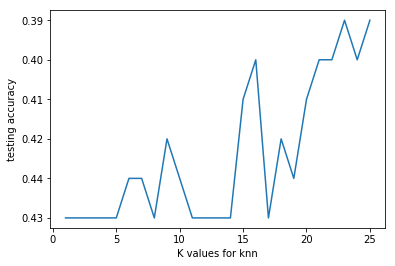

In [57]:
plt.plot(knn_range, scores)
plt.xlabel('K values for knn')
plt.ylabel('testing accuracy')

### 6.3 Using GridSearchCV for KNN

In [58]:
from sklearn.model_selection import GridSearchCV
knn_model = KNeighborsClassifier()

In [60]:
param_grid = { "n_neighbors"      : [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]             
                }

In [61]:
optimized_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', cv=5 )
optimized_knn.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [62]:
print("The best Score of the KNN Model is ", optimized_knn.best_score_)
print("The best Params of the KNN Model is ", optimized_knn.best_params_)
print("The best Estimator of the KNN Model is ", optimized_knn.best_estimator_)

The best Score of the KNN Model is  0.5066666666666667
The best Params of the KNN Model is  {'n_neighbors': 11}
The best Estimator of the KNN Model is  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')


In [64]:
final_knn = optimized_knn.best_estimator_
y_pred = final_knn.predict(x_test)
print(metrics.accuracy_score(y_pred, y_test)) 

0.435


### 7. Applying SVM

In [69]:
from sklearn.svm import SVC

In [71]:
svc = SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("The accuracy score with SVM is : ", metrics.accuracy_score(y_test,y_pred))

The accuracy score with SVM is :  0.39


### 8. Applying Naive Bayes

In [76]:
from sklearn.naive_bayes import GaussianNB

In [77]:
nb = GaussianNB()
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print("The accuracy score with SVM is : ", metrics.accuracy_score(y_test,y_pred))

The accuracy score with SVM is :  0.375


### 9. Applying Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=100, max_depth = 10)
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
rfc.fit(x_train,y_train) 
y_pred=rfc.predict(x_test)
print("The accuracy score with SVM is : ", metrics.accuracy_score(y_test,y_pred))

The accuracy score with SVM is :  0.475
